# Modelación de flujo de agua subterránea en un medio heterogéneo/Planta

Script que resuelve la ecuacion de flujo estacionario de Toth
a partir de elemento finito
Por: Ricardo Balam Chagoya Morales

In [1]:
from __future__ import print_function
from fenics import *

In [2]:
# Crea el mallado rectangular con intervalos de 20 metros
mesh = RectangleMesh(Point(0,0), Point(200,100), 10, 5)
V = FunctionSpace(mesh, 'P', 1)

In [3]:
# Se definen las condiciones de frontera superior
u_D = Expression('100+x[0]*tan(0.23)+5*sin((10*x[0])/(cos(0.23)))/cos(0.23)', degree=1)

tol = 1E-14
def frontera_D(x, dentro_frontera):
 if dentro_frontera:
   if near(x[1], 100, tol):
      return True
   else:
      return False
 else:
   return False

bc = DirichletBC(V, u_D, frontera_D)


# Se define el problema variacional
u = TrialFunction(V)
v = TestFunction(V)
f = Constant(0)
a = dot(grad(u), grad(v))*dx
g = Constant(0)
L = f*v*dx - g*v*ds

In [4]:
# Se realiza el calculo de la solucion
u = Function(V)
solve(a == L, u, bc)

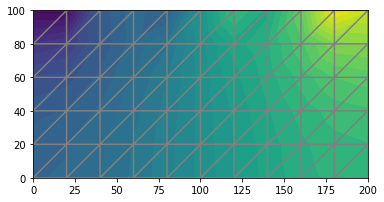

In [5]:
# Se plotea la solucion
plot(u)
plot(mesh)

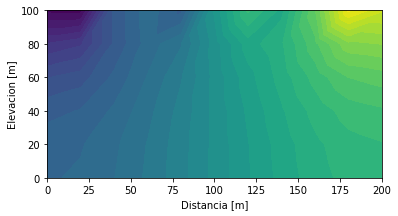

In [6]:
# Se realiza el ploteo de la solucion
import matplotlib.pyplot as plt

plot(u)
plt.ylabel('Elevacion [m]')
plt.xlabel('Distancia [m]')
plt.show()